In [ ]:
#Intraday Trading Strategies for Stock Markets Using Clustering and Differential Evolution

'''
This work presents a data science approach to provide a stock trading strategy based
on behavioral trends. Creating an intraday trading strategy, treating each daily behavior
as an individual and clustering based on its time series using a hierarchical clustering 
algorithm. Also a differential evolution was used to perform an intensification search in 
promising regions and adjust the borders regions parameters by the proposed model of this 
research. The main challenge for application in an emerging market are the creation of an 
adaptive strategy due to the high volatility of external factors, a wide range of results 
are generated to evaluate the strategy. Excellent results were obtained, mainly regarding 
the returns normality, tests were performed over a period of three years, presenting better 
results than Buy-\&-Hold and with a very reduced drawdown, therefore this strategy can be 
used as leverage. Thus, allowing for an investment greater than the monetary value of the 
invested capital.
'''

# Notebook


''' 
Notebook built to reproduce the study of the paper submitted to WCCI
INSTRUCTIONS FOR RUNNING THE CODE ARE IN README.MD
''' 


# Angelo Darcy Molin Brun - angelo.molin@ufms.br
# Adriano Cesár Machado Pereira - adrianoc@ufmg.br

In [1]:
#Configuration of de Experiment

Otimization = False #[True] [False] Slow if True 
PlotClusters = False #[True] [False] Extensive Visualization
Windowing = 1 #[1] Six months - [2] One year - [3] Two years - [4] Accumulated


In [2]:
#Figure Plot by Time
def FigureBar():

    hora = sorted(Dados.hora.unique())
    hora = hora[0:31]
    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaGanhoCompradoHoraCompra.count(tempo) + listaPerdaCompradoHoraCompra.count(
            tempo) + listaPerdaVendidoHoraCompra.count(tempo) + listaGanhoVendidoHoraCompra.count(tempo))
        ylabelVenda.append(listaGanhoCompradoHoraVenda.count(tempo) + listaGanhoVendidoHoraVenda.count(
            tempo) + listaPerdaCompradoHoraVenda.count(tempo) + listaPerdaVendidoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribuition Buy/Sell')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()

    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (Gain)
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaGanhoCompradoHoraCompra.count(tempo) + listaGanhoVendidoHoraCompra.count(tempo))
        ylabelVenda.append(listaGanhoCompradoHoraVenda.count(tempo) + listaGanhoVendidoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sell With Positive Returns')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()

    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (Loss)
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaPerdaCompradoHoraCompra.count(tempo) + listaPerdaVendidoHoraCompra.count(tempo))
        ylabelVenda.append(listaPerdaCompradoHoraVenda.count(tempo) + listaPerdaVendidoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sell With Negative Returns')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()

    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (Buy)
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaGanhoCompradoHoraCompra.count(tempo) + listaPerdaCompradoHoraCompra.count(tempo))
        ylabelVenda.append(listaGanhoCompradoHoraVenda.count(tempo) + listaPerdaCompradoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Short')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()
    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (BUY GAINS)
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaGanhoCompradoHoraCompra.count(tempo))
        ylabelVenda.append(listaGanhoCompradoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Short (Positive Returns)')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()
    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (buy Losses)
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaPerdaCompradoHoraCompra.count(tempo))
        ylabelVenda.append(listaPerdaCompradoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Short (Negative Returns)')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()
    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (Sold)
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaPerdaVendidoHoraCompra.count(tempo) + listaGanhoVendidoHoraCompra.count(tempo))
        ylabelVenda.append(listaGanhoVendidoHoraVenda.count(tempo) + listaPerdaVendidoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Long')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()
    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (Sold at Gain)
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaGanhoVendidoHoraCompra.count(tempo))
        ylabelVenda.append(listaGanhoVendidoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Long (Positive Returns)')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()

    # ----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (Sold at Loss)
    listahora = []
    ylabelCompra = []
    ylabelVenda = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabelCompra.append(listaPerdaVendidoHoraCompra.count(tempo))
        ylabelVenda.append(listaPerdaVendidoHoraVenda.count(tempo))

    plt.bar(listahora, ylabelCompra);
    ylabelVenda = [x * -1 for x in ylabelVenda]
    plt.bar(listahora, ylabelVenda, color='r')
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Long (Negative Returns)')
    plt.ylabel('Frequency')
    plt.legend(['Buy', 'Sell'])
    plt.show()


def FigureBarMagnitude():

    #----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour
    listahora = []
    ylabel = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabel.append(listaGanhoCompradoHoraCompraMagnitude[str(tempo)] + listaGanhoVendidoHoraCompraMagnitude[str(tempo)] + listaPerdaCompradoHoraCompraMagnitude[str(tempo)]+ listaPerdaVendidoHoraCompraMagnitude[str(tempo)]+ listaGanhoCompradoHoraVendaMagnitude[str(tempo)] + listaGanhoVendidoHoraVendaMagnitude[str(tempo)] + listaPerdaCompradoHoraVendaMagnitude[str(tempo)]+ listaPerdaVendidoHoraVendaMagnitude[str(tempo)])


    plt.bar(listahora,ylabel);
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sell (Magnitude)')
    plt.ylabel('Pontos')
    plt.legend(['Retorno Pontos'])
    plt.show()

    #----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (buy)
    listahora = []
    ylabel = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabel.append(listaGanhoCompradoHoraCompraMagnitude[str(tempo)] + listaPerdaCompradoHoraCompraMagnitude[str(tempo)]+listaGanhoCompradoHoraVendaMagnitude[str(tempo)] + listaPerdaCompradoHoraVendaMagnitude[str(tempo)])

    plt.bar(listahora,ylabel);
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Short (Magnitude)')
    plt.ylabel('Pontos')
    plt.legend(['Retorno Pontos'])
    plt.show()
     #----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (Sold)
    listahora = []
    ylabel = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabel.append( listaGanhoVendidoHoraCompraMagnitude[str(tempo)] + listaPerdaVendidoHoraCompraMagnitude[str(tempo)]+  listaGanhoVendidoHoraVendaMagnitude[str(tempo)] + listaPerdaVendidoHoraVendaMagnitude[str(tempo)])


    plt.bar(listahora,ylabel);
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Long (Magnitude)')
    plt.ylabel('Pontos')
    plt.legend(['Retorno Pontos'])
    plt.show()
    #----------------------------------------//----------------------------------------
    # Plot the frequency of purchase and sale orders per hour (Achievement)
    listahora = []
    ylabel = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabel.append( listaGanhoVendidoHoraCompraMagnitude[str(tempo)] +  listaPerdaVendidoHoraCompraMagnitude[str(tempo)]+ listaGanhoCompradoHoraVendaMagnitude[str(tempo)] +  listaPerdaCompradoHoraVendaMagnitude[str(tempo)])


    plt.bar(listahora,ylabel);
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale (Magnitude - Achievement)')
    plt.ylabel('Pontos')
    plt.legend(['Retorno Pontos'])
    plt.show()

    #----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (buy - Achievement)
    listahora = []
    ylabel = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabel.append(listaGanhoCompradoHoraVendaMagnitude[str(tempo)] + listaPerdaCompradoHoraVendaMagnitude[str(tempo)])

    plt.bar(listahora,ylabel);
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Short (Magnitude - Achievement)')
    plt.ylabel('Pontos')
    plt.legend(['Retorno Pontos'])
    plt.show()
     #----------------------------------------//----------------------------------------
    # Plot the frequency of buy and sale orders per hour (Sold - Achievement)
    listahora = []
    ylabel = []
    for tempo in hora:
        listahora.append(str(tempo))
        ylabel.append( listaGanhoVendidoHoraCompraMagnitude[str(tempo)] + listaPerdaVendidoHoraCompraMagnitude[str(tempo)])


    plt.bar(listahora,ylabel);
    plt.xticks(rotation=90);

    plt.title('Distribution Buy/Sale Operating Long (Magnitude - Achievement)')
    plt.ylabel('Pontos')
    plt.legend(['Retorno Pontos'])
    plt.show()
    

#Validates the buy and sale of assets
def verificaCompra(Representacao, correlacaoMomento, listaMedias,  posicao, ultimoNegocio, plot, comprado, vendido,parametrosNegociacao):
    
    somaGanho = 0
    somaRepresentacao = 0
    somaCorrelacao = 0
    ganho = 0
    clusters = []
    
    for i in range(0,len(correlacaoMomento)):
        ganho =  listaMedias[i][ultimoNegocio] - listaMedias[i][posicao]
        if correlacaoMomento[i] > 0.5:
            somaCorrelacao = somaCorrelacao + correlacaoMomento[i]*Representacao[i]
            somaRepresentacao = somaRepresentacao + Representacao[i]
            
            somaGanho = somaGanho + ganho*(Representacao[i]*1)
            clusters.append(i)
    
    
    if (somaGanho != 0) & (somaCorrelacao != 0):
        parametroGanho = somaGanho/somaRepresentacao
        parametroCorrelacao = somaCorrelacao/somaRepresentacao
    else:
        parametroGanho = 0
        parametroCorrelacao = 0
        
    if plot:
        print('Gain Parameter: ', parametroGanho)
        print('Gain Correlation: ', parametroCorrelacao)
    
        print("Clusters: ", clusters)

    if (parametroGanho > medidaGanho) & ((parametroCorrelacao > medidaCorrelacao) | (len(clusters) == 1)):
        if plot:
            print('Buy')
        return 1
    else:
        if (parametroGanho < medidaGanho ) & (parametroGanho > margemRisco ):
            if plot:
                print('Does not Perform')
            return 0
        else:
            #if (parametroGanho < medidaGanho*-1) & (parametroCorrelacao > medidaCorrelacao):
            if (parametroGanho < margemRisco) & ((parametroCorrelacao > medidaCorrelacaoRisco)  | (len(clusters) == 1)) & (comprado>0):
                if plot:
                    print('Sold')
                return -1

    if (parametroGanho < (-1*medidaGanho)) & ((parametroCorrelacao > medidaCorrelacao) | (len(clusters) == 1)):
        if plot:
            print('Sold Long')
        return 2
    else:
        if (parametroGanho > margemRisco) & ((parametroCorrelacao > medidaCorrelacaoRisco)  | (len(clusters) == 1))& (vendido>0):
            if plot:
                print('Buy Long')
        return -2
    
    #print('Inconsistente')
    return 3
    

In [3]:
# Teste de estratégia para MiniIndice
from Main import estruturaDados
import pandas as pd
import numpy as np
from datetime import datetime
import math
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import fcluster
from sklearn import linear_model
import seaborn as sns
from scipy.stats import zscore
import statistics 

DatasIniciaisMes = ['2014-01-02' , '2014-02-03' , '2014-03-06' , '2014-04-01' , '2014-05-02' , '2014-06-02' , '2014-07-01' , '2014-08-01' , '2014-09-01' , '2014-10-01' , '2014-11-03' , '2014-12-01' ,
                    '2015-01-02' , '2015-02-02' , '2015-03-02' , '2015-04-01' , '2015-05-04' , '2015-06-01' , '2015-07-01' , '2015-08-03' , '2015-09-01' , '2015-10-01' , '2015-11-03' , '2015-12-01' ,
                    '2016-01-04' , '2016-02-01' , '2016-03-01' , '2016-04-01' , '2016-05-02' , '2016-06-01' , '2016-07-01' , '2016-08-01' , '2016-09-01' , '2016-10-03' , '2016-11-01' , '2016-12-01' , 
                    '2017-01-02' , '2017-02-01' , '2017-03-02' , '2017-04-03' , '2017-05-02' , '2017-06-01' , '2017-07-03' , '2017-08-01' , '2017-09-01' , '2017-10-02' , '2017-11-01' , '2017-12-01' , 
                    '2018-01-02' , '2018-02-01' , '2018-03-01' , '2018-04-02' , '2018-05-02' , '2018-06-01' , '2018-07-02' , '2018-08-01' , '2018-09-03' , '2018-10-01' , '2018-11-01' , '2018-12-03' , 
                    '2019-01-02' , '2019-02-01' , '2019-03-01' , '2019-04-01']



print('Reading...')
Dados = pd.read_csv("miniIndice.csv")

lista = []
datahora = []
time = []
data = []
for i in range(0,len(Dados)):
    lista.append('miniIndice')
    datahora.append(datetime.strptime(Dados.iloc[i]["data"]+ " " + Dados.iloc[i]["hora"], "%Y/%m/%d %H:%M:%S"))
    time.append(datetime.strptime(Dados.iloc[i]["data"]+ " " + Dados.iloc[i]["hora"], "%Y/%m/%d %H:%M:%S").time())
    data.append(datetime.strptime(Dados.iloc[i]["data"]+ " " + Dados.iloc[i]["hora"], "%Y/%m/%d %H:%M:%S").date())


Dados["codigo"] = lista;
Dados["datahora"] = datahora
Dados["data"] = data
Dados["hora"] = time

ativosAnalisados = ['miniIndice']

print('Mount the Data in the Formatted Series...')
# Monta estrutura baseada em Séries para aplicação de algoritmos
DadosSeries = estruturaDados.MontaSerie_Cluster(Dados,ativosAnalisados);

print('Segmentation of Days...')
#Segmenta os dados por dia semana
DadosDiaSemana = estruturaDados.segmentaDias(Dados, DadosSeries, ativosAnalisados)

print('Data Processing...')
[DadosFiltrados, DiasAnalisados] = estruturaDados.tratamentoDados(DadosDiaSemana)


hora= sorted(Dados.hora.unique())

print('Structure LogRetorno...')
logRetornoTratado = estruturaDados.DadosEntrada(DadosFiltrados, hora, 1)

#Dados
DadosTratados = logRetornoTratado

sequencia = range(0,len(DadosTratados.T))
DadosTratados.columns=[*sequencia]

#Cria lista de Dias com dados completos
dt_idx = pd.DatetimeIndex(DiasAnalisados, dtype='datetime64[ns, UTC]', name=u'DATE', freq=None)

print("Finished")

Reading...
Mount the Data in the Formatted Series...
Asset: miniIndice
Successfully Executed!!!
Segmentation of Days...
Data Processing...
Structure LogRetorno...
Finished


----------//----------
Studied Month:  2016-01-04
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  490
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accumulated Month:  1163
----------//----------
Studied Month:  2016-02-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  509
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  392
----------//----------
Studied Month:  2016-03-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  527
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  -998
----------//----------
Studied Month:  2016-04-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  549
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  4040
----------//----------
Studied Month:  2016-05-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  569
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  -443
----------//----------
Studied Month:  2016-06-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  590
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  3357
----------//----------
Studied Month:  2016-07-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  612
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  2037
----------//----------
Studied Month:  2016-08-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  633
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  1886
----------//----------
Studied Month:  2016-09-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  656
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  383
----------//----------
Studied Month:  2016-10-03
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  677
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  4268
----------//----------
Studied Month:  2016-11-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  697
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  557
----------//----------
Studied Month:  2016-12-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  717
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  2163
----------//----------
Studied Month:  2017-01-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  738
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  3709
----------//----------
Studied Month:  2017-02-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  759
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  4936
----------//----------
Studied Month:  2017-03-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  777
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  2957
----------//----------
Studied Month:  2017-04-03
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  799
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  -294
----------//----------
Studied Month:  2017-05-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  817
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  3266
----------//----------
Studied Month:  2017-06-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  839
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  660
----------//----------
Studied Month:  2017-07-03
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  860
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  717
----------//----------
Studied Month:  2017-08-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  881
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  2169
----------//----------
Studied Month:  2017-09-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  904
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  1184
----------//----------
Studied Month:  2017-10-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  924
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  -6
----------//----------
Studied Month:  2017-11-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  945
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  986
----------//----------
Studied Month:  2017-12-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  964
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  1473
----------//----------
Studied Month:  2018-01-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  983
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  2715
----------//----------
Studied Month:  2018-02-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1004
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  234
----------//----------
Studied Month:  2018-03-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1021
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  2916
----------//----------
Studied Month:  2018-04-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1042
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  4553
----------//----------
Studied Month:  2018-05-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1063
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  1729
----------//----------
Studied Month:  2018-06-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1084
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  2377
----------//----------
Studied Month:  2018-07-02
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1105
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  647
----------//----------
Studied Month:  2018-08-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1126
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  6283
----------//----------
Studied Month:  2018-09-03
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1149
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  -377
----------//----------
Studied Month:  2018-10-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1168
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  9888
----------//----------
Studied Month:  2018-11-01
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1190
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  1484
----------//----------
Studied Month:  2018-12-03
-TRAINING-
Formation of Clusters (Training)
Quantity Days:  1209
-VALIDATION-
   MGanhoPadrao  MGanhoCorrelacao  MRiscoCorrelacao  MRiscoPadrao
0         0.002               0.5               0.7             0
-TEST-


c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\pichau\pycharmprojects\wcci2020\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iter

Accumulated Month:  1010


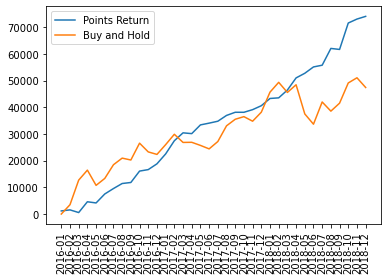

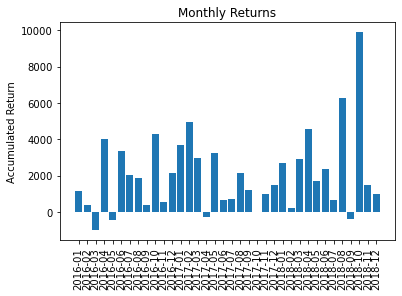

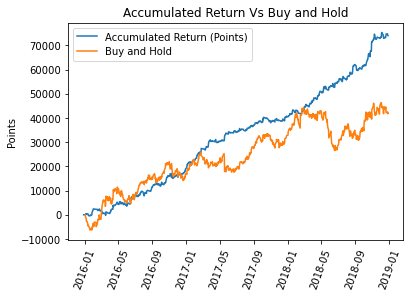

------------------------------//------------------------------


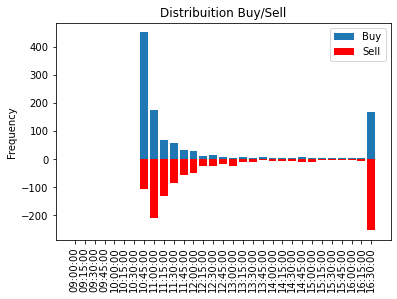

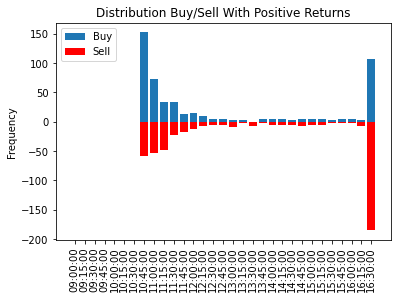

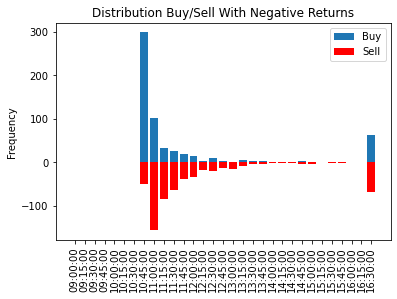

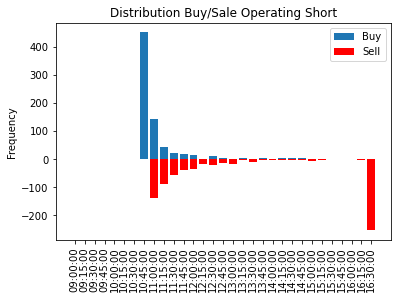

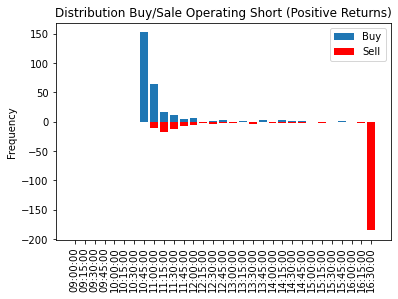

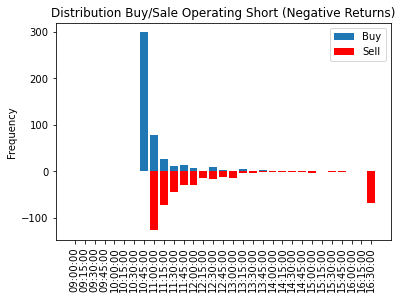

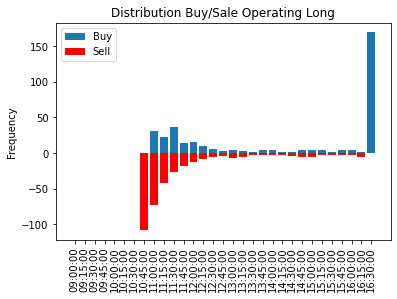

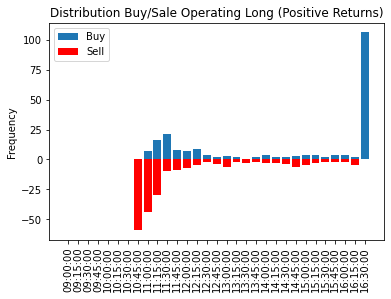

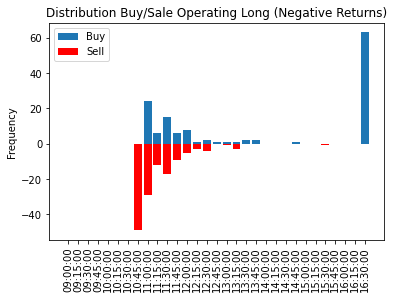

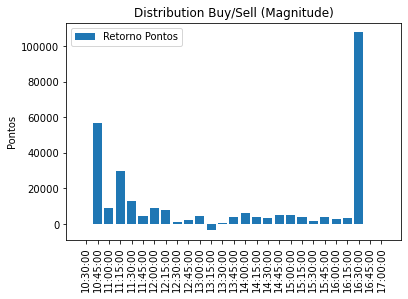

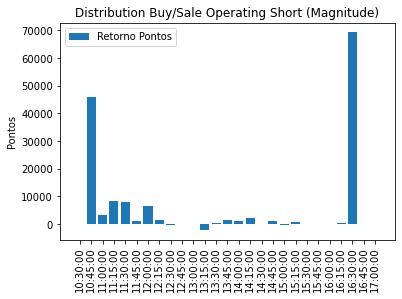

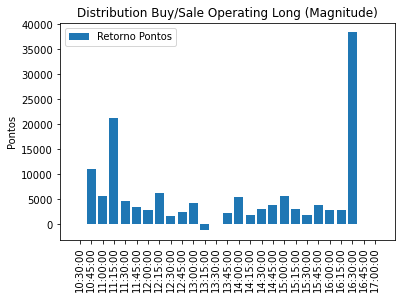

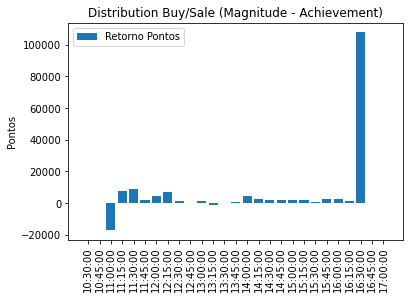

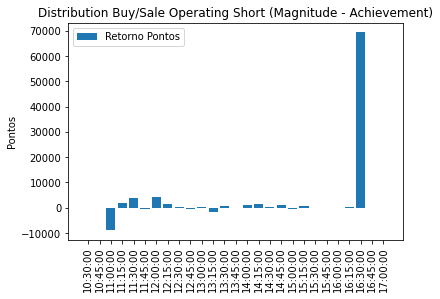

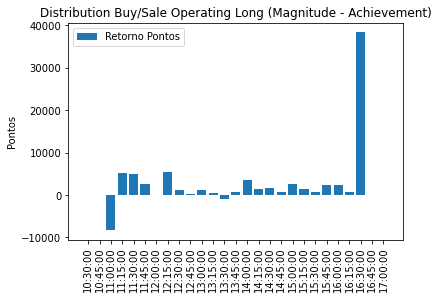

In [45]:
from sklearn import svm
from sklearn.svm import SVR
from random import uniform, randrange
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

## NORMALIZA OS DADOS DO LOG RETORNO
#LogAux = DadosTratados.T.apply(zscore)
#LogRetornoNormalizado = LogAux.T

hora= sorted(Dados.hora.unique())

#Dados
DadosTratados = logRetornoTratado
#DadosTratados = DadosFiltrados
#DadosTratados = LogRetornoNormalizado


#K - Tamanho do Cluster
K = 30

# Controla o ganho em todos os períodos
ganhoPeriodo = []
ganhoPeriodo.append(0)

ganhoDiario = []
ganhoDiario.append(0)

ganhoMensal = []
ganhoMensal.append(0)

ValorAtivoFinalMes = []

EstudadosDatas = []

FinalMesValor = []
FinalDiaValor = []

listaGanhoCompradoHoraCompra = []  
listaGanhoCompradoHoraVenda = []
listaGanhoVendidoHoraCompra = []
listaGanhoVendidoHoraVenda = []
listaPerdaCompradoHoraCompra = []  
listaPerdaCompradoHoraVenda = []
listaPerdaVendidoHoraCompra = []
listaPerdaVendidoHoraVenda = []
listDaysGain = []
listDaysLoss = []
listDaysNoOperate = []
listaGanhoCompradoHoraCompraMagnitude = {} 
listaGanhoCompradoHoraVendaMagnitude = {}
listaGanhoVendidoHoraCompraMagnitude = {}
listaGanhoVendidoHoraVendaMagnitude = {}
listaPerdaCompradoHoraCompraMagnitude = {}  
listaPerdaCompradoHoraVendaMagnitude = {}
listaPerdaVendidoHoraCompraMagnitude = {}
listaPerdaVendidoHoraVendaMagnitude = {}
for tempo in hora:
    listaGanhoCompradoHoraCompraMagnitude[str(tempo)] = 0
    listaGanhoCompradoHoraVendaMagnitude[str(tempo)] = 0
    listaGanhoVendidoHoraCompraMagnitude[str(tempo)] = 0
    listaGanhoVendidoHoraVendaMagnitude[str(tempo)] = 0
    listaPerdaCompradoHoraCompraMagnitude[str(tempo)] = 0
    listaPerdaCompradoHoraVendaMagnitude[str(tempo)] = 0
    listaPerdaVendidoHoraCompraMagnitude[str(tempo)] = 0
    listaPerdaVendidoHoraVendaMagnitude[str(tempo)] = 0


# Setting for entering the repeat loop
if Windowing == 1:
    temp = range(18,54);
    intervalo = 6;
if Windowing == 2:
    temp = range(12,48)
    intervalo = 12
if Windowing == 3:
    temp = range(0,36)
    intervalo = 24
if Windowing == 4:
    temp = range(24,60)
    intervalo = 0
    
#Two years
 ## range(0,36)
 ## intervalo = 24
 ##EstudadosDatas.append(DatasIniciaisMes[i+intervalo][0:7])
#One years
 ## range(12,48)
 ## intervalo = 12
 ##EstudadosDatas.append(DatasIniciaisMes[i+intervalo][0:7])
#Six months
 ## range(18,54)
 ## intervalo = 6
 ##EstudadosDatas.append(DatasIniciaisMes[i+intervalo][0:7])
 ##inicio = dt_idx.get_loc(DatasIniciaisMes[i])
#Acumulativo
 ## range(24,60)
 ## intervalo = 0
 ##EstudadosDatas.append(DatasIniciaisMes[0][0:7])
 ##inicio = dt_idx.get_loc(DatasIniciaisMes[0])
for i in temp: 
    #intervalo = 24
    print("----------//----------")
    print("Studied Month: ", DatasIniciaisMes[i+intervalo])
    EstudadosDatas.append(DatasIniciaisMes[i+intervalo][0:7])
    #Formação dos Cluster (Treinamento)
    print("-TRAINING-")
    print('Formation of Clusters (Training)')
    inicio = dt_idx.get_loc(DatasIniciaisMes[0])
    fim = dt_idx.get_loc(DatasIniciaisMes[i+intervalo])
    
    DadosAux = DadosTratados.T
    DadosTreinamento = DadosAux[inicio:fim]
    Z = estruturaDados.DadosToCluster(DadosTreinamento, False) # Ultimo parametro é o plot(True or False)
    listaCluster = estruturaDados.segmentaCluster(Z, K, False) # Ultimo parametro é o plot(True or False)

    [listaOrdenada, QuantidadeDias, Representacao]  = estruturaDados.ordenacaoTamanhoCluster(DadosTreinamento, listaCluster)
    if PlotClusters:
        print("Plot the Clusters Formed")
        estruturaDados.printClusters(listaCluster,QuantidadeDias, Representacao, listaOrdenada, DadosTreinamento)

    
    
    #Validação
    print('-VALIDATION-')
    [listaCurvas, listaMedias] = estruturaDados.CurvasClusters2(DadosTreinamento, listaCluster, listaOrdenada)
    
    
    lista = []
    lista.append(0.002)
    lista.append(0.5) # Modificar Este parâmetro
    lista.append(0.7)
    lista.append(0)
    
    
    #Otimization - Execute Differential Evolution
    if Otimization:
        parametrosNegociacao = EvolucaoDiferencial(10, 70, 1.5, DadosTreinamento, listaMedias, Representacao, Dados)
    else:
        parametrosNegociacao = pd.DataFrame([lista],columns=['MGanhoPadrao', 'MGanhoCorrelacao', 'MRiscoCorrelacao', 'MRiscoPadrao'], index=[0])
        
    print(parametrosNegociacao)
    #Test
    print('-TEST-')
    inicio = dt_idx.get_loc(DatasIniciaisMes[i+intervalo])
    fim = dt_idx.get_loc(DatasIniciaisMes[i+intervalo+1])


    #Dados Não Normalizados
    DadosAux = DadosFiltrados
    DadosTeste = DadosAux[inicio:fim]
    
    FinalMesValor.append(DadosTeste.iloc[len(DadosTeste)-1][30])
    
    stoplossAux = 0.001

    ganhoAcumuladoMes = 0;
                               
    
    
    for dia in range(0,len(DadosTeste)):
        [ganho, CompradoHoraCompra, CompradoHoraVenda, VendidoHoraCompra, VendidoHoraVenda] = SimulacaoEstrategiaII(dia, False, stoplossAux, DadosTeste, listaMedias, Representacao,parametrosNegociacao, Dados)
        if ganho > 0:
            listDaysGain.append(dia)
            if CompradoHoraCompra != 0:
                listaGanhoCompradoHoraCompra.append(CompradoHoraCompra)
                listaGanhoCompradoHoraCompraMagnitude[str(CompradoHoraCompra)] = listaGanhoCompradoHoraCompraMagnitude[str(CompradoHoraCompra)]+ganho
            if CompradoHoraVenda != 0:
                listaGanhoCompradoHoraVenda.append(CompradoHoraVenda)
                listaGanhoCompradoHoraVendaMagnitude[str(CompradoHoraVenda)] = listaGanhoCompradoHoraVendaMagnitude[str(CompradoHoraVenda)]+ganho
            if VendidoHoraCompra != 0:
                listaGanhoVendidoHoraCompra.append(VendidoHoraCompra)
                listaGanhoVendidoHoraCompraMagnitude[str(VendidoHoraCompra)] = listaGanhoVendidoHoraCompraMagnitude[str(VendidoHoraCompra)]+ganho
            if VendidoHoraVenda != 0:
                listaGanhoVendidoHoraVenda.append(VendidoHoraVenda)
                listaGanhoVendidoHoraVendaMagnitude[str(VendidoHoraVenda)] = listaGanhoVendidoHoraVendaMagnitude[str(VendidoHoraVenda)]+ganho
        if ganho < 0:
            listDaysLoss.append(dia)
            if CompradoHoraCompra != 0:
                listaPerdaCompradoHoraCompra.append(CompradoHoraCompra)
                listaPerdaCompradoHoraCompraMagnitude[str(CompradoHoraCompra)] = listaPerdaCompradoHoraCompraMagnitude[str(CompradoHoraCompra)]+ganho
            if CompradoHoraVenda != 0:
                listaPerdaCompradoHoraVenda.append(CompradoHoraVenda)
                listaPerdaCompradoHoraVendaMagnitude[str(CompradoHoraVenda)] = listaPerdaCompradoHoraVendaMagnitude[str(CompradoHoraVenda)]+ganho
            if VendidoHoraCompra != 0:
                listaPerdaVendidoHoraCompra.append(VendidoHoraCompra)
                listaPerdaVendidoHoraCompraMagnitude[str(VendidoHoraCompra)] = listaPerdaVendidoHoraCompraMagnitude[str(VendidoHoraCompra)]+ganho
            if VendidoHoraVenda != 0:
                listaPerdaVendidoHoraVenda.append(VendidoHoraVenda)
                listaPerdaVendidoHoraVendaMagnitude[str(VendidoHoraVenda)] = listaPerdaVendidoHoraVendaMagnitude[str(VendidoHoraVenda)]+ganho
        if ganho == 0:
            listDaysNoOperate.append(dia)
        
        ganhoDiario.append(ganho) 
        ganhoAcumuladoMes = ganhoDiario[-1] + ganhoAcumuladoMes
        FinalDiaValor.append(DadosTeste.iloc[dia][30])
    
    print("Accumulated Month: ", ganhoAcumuladoMes)
    ganhoPeriodo.append(ganhoAcumuladoMes + ganhoPeriodo[-1])
    ganhoMensal.append(ganhoAcumuladoMes)
    ValorAtivoFinalMes.append(FinalMesValor[-1]-FinalMesValor[0])
    

#--------//--------#
#plot os ganhos em termos mensais
plt.plot(EstudadosDatas,ganhoPeriodo[1:])
plt.plot(EstudadosDatas,ValorAtivoFinalMes)
plt.xticks(rotation=90);
plt.legend(["Points Return", "Buy and Hold"])
plt.show()

plt.bar(EstudadosDatas,ganhoMensal[1:])
plt.title("Monthly Returns")
plt.ylabel("Accumulated Return")
plt.xticks(rotation=90);
plt.show()

#--------//--------#
#plot o ganho em termos diários
acumula = []
acumula.append(0)
for i in ganhoDiario:
    acumula.append(acumula[-1]+i)

real = []
for i in FinalDiaValor:
    real.append(i-FinalDiaValor[0])
    
plt.plot(DiasAnalisados[fim-len(acumula):fim], acumula)
plt.plot(DiasAnalisados[fim-len(FinalDiaValor):fim], real)
plt.legend(['Accumulated Return (Points)', 'Buy and Hold'])
plt.title('Accumulated Return Vs Buy and Hold')
plt.xticks(rotation=70);
plt.ylabel('Points')
plt.show()
print("------------------------------//------------------------------")
#Plota as Figuras em Barra referente ao horário de negociações
hora = hora[6:-7]
FigureBar()
FigureBarMagnitude()



In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

i = 1
lista = listaCluster[listaOrdenada[i]]
train = []

for i in lista:
    train.append(DadosTreinamento.iloc[i].values)
#print(lista)

X = []
y = []
for t in train:
    X.append(t[1:20])
    y.append(t[30])
    

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

svrs = [svr_rbf, svr_lin, svr_poly]

treinamento = np.array(X) * 100 
teste = np.array(y) * 100


#for teste in range(1,len(X)):
    #print(teste)
    
svr_rbf.fit(treinamento,teste)
svr_lin.fit(treinamento,teste)
svr_poly.fit(treinamento,teste)

a =2
print(svr_rbf.predict([treinamento[a]]))
print(svr_lin.predict([treinamento[a]]))
print(svr_poly.predict([treinamento[a]]))

print(teste[a])




#for ix, svr in enumerate(svrs):
#    print(svr)
#    svr.fit(X, y)
#    print(svr.predict([X[4]]))
#    print(y[4])
    
#svr_rbf = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)

#regr = svm.SVR()

#svr_rbf.fit(X, y)

#print(svr_rbf.predict([X[1]]))
#print(y[1])


#for curvaDia in train:
#    plt.plot(a,curvaDia);

#plt.show()

#lista = listaCluster[listaOrdenada[3]]
#for i in lista:
#    train.append(Dados.iloc[i].values)

#a = range(0,31)

#for curvaDia in train:
#    plt.plot(a,curvaDia);

#plt.show()

In [ ]:
a =4
print(svr_rbf.predict([treinamento[a]]))
print(svr_lin.predict([treinamento[a]]))
print(svr_poly.predict([treinamento[a]]))

print(teste[a])

In [ ]:
X = treinamento[1]
y = teste[1]

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw, label='{} model'.format(kernel_label[ix]))
    print(svr.support_)
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none", edgecolor=model_color[ix], s=50, label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)], y[np.setdiff1d(np.arange(len(X)), svr.support_)], facecolor="none", edgecolor="k", s=50, label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [44]:
 def SimulacaoEstrategiaII(dia, plot, stoplossAux, DadosEntrada,listaMedias  , Representacao, parametrosNegociacao, Dados):

        hora = sorted(Dados.hora.unique())
        hora = hora[0:31]

        if (plot):
            fig = plt.figure()
            ax = fig.add_subplot(1, 1, 1)
            ax.plot(DadosEntrada.iloc[dia])

        ## Estrutura Correlação
        cabecalho = ['curva']

        # Teste Apenas os 7 primeiros clusters
        cabecalho.extend([*range(0, 7)])

        # cabecalho.extend(list(range(0,len(listaMedias)))) ---- TODOS OS CLUSTERS
        correlacaoMomento = pd.DataFrame(columns=cabecalho);
        ##

        ultimoNegocio = 30  # Indice limite para negociacao
        valorCompraVenda = DadosEntrada.iloc[dia][ultimoNegocio]
        inicio = DadosEntrada.iloc[dia][0]
        stopLossCoberto = inicio * 2
        stopLossDescoberto = 0

        posCorrelacao = 0

        controleCompra = 0  # Controla de quanto em quanto tempo irá efetuar uma nova compra

        plotVerificaCompra = False  # Esse plot imprime variáveis enquanto roda o Modelo

        ## Controlam a quantidade de ativos vendidos e comprados
        compras = 0
        vendas = 0

        op = 0  # Controla a quantidade de Operações
        ##

        ganhoTotal = 0
        CompradoHoraCompra = 0
        CompradoHoraVenda = 0
        VendidoHoraCompra = 0
        VendidoHoraVenda = 0
        if inicio == 0:
            print("Day With Data Problem", dia)
        else:
            for i in range(0, len(DadosEntrada.iloc[dia]) - 1):
                status = 0 #Controla o Status de Short e Long
                correlacaoPontos = []
                correlacaoPontos.append(1 + (math.log(DadosEntrada.iloc[dia][i] / inicio)))
                # Apensa os 7 primeiros clusters
                # for j in range(0,len(listaMedias)): #---- TODOS OS CLUSTERS
                for j in range(0, 7):
                    correlacaoPontos.append(listaMedias[j][i - 2])

                correlacaoMomento.loc[posCorrelacao] = np.array(correlacaoPontos)*100 #Ajustar base para o SVM
              
                
                if i > 6:
                    # Correlação dos ativos até o momento
                    Correlacao = correlacaoMomento.corr('pearson')
                    # print(Correlacao['curva'][1:])
                    if plot:
                        print("Hora: ", hora[i])
                        
                    ## Aplicar montar o Machine Learning
                    ## Make a Train
                    trainX = []
                    trainY = []
                    train = []
                    ## Para cada grupo com o Parametro negociação superior ao parâmetro de Correlação
                    #print(parametrosNegociacao['MRiscoCorrelacao'][0])
                    Caramba = 0;
                    lista = []
                    for j in range(0, len(Correlacao['curva'][1:])):
                        if (Correlacao['curva'][j] >= parametrosNegociacao['MGanhoCorrelacao'][0]):
                            Caramba = 1;
                            lista = listaCluster[listaOrdenada[j]]
                        
                    
                    if Caramba == 1:
                                               
                        for t in lista:
                            train.append(DadosTreinamento.iloc[t].values)

                        for t in train:
                            #O primeiro termo não contabiliza por conta o i == 0, do qual todos apresentam valor 1
                            trainX.append(t[0:i])
                            trainY.append(t[ultimoNegocio])

                        trainX = np.array(trainX) * 100 
                        trainY = np.array(trainY) * 100

                        # Definindo a Rede
                        #svr_rbf = []
                        #svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

                        #svr_rbf.fit(trainX,trainY)
                        
                        #print(trainX)
                        #print(trainY)
                        
                      
                        
                        regr = MLPRegressor(hidden_layer_sizes=(i*2,int(i/2),i*2),max_iter=1000).fit(trainX, trainY)
                        
                        
                        

                        #print("TESTE")

                        #print("Ultimo nogócio / predição")
                        #print("Ultimo dia: ",DadosTreinamento.iloc[dia][ultimoNegocio]) 
                        #predicaoUltimoNegocio = svr_rbf.predict([np.array(correlacaoMomento["curva"][1:])*100])
                        #print("Correlação Momento: ",np.array(correlacaoMomento["curva"][1:])*100 )
                        predicaoUltimoNegocio = regr.predict([np.array(correlacaoMomento["curva"][1:])])
                        #print("Predição: ",predicaoUltimoNegocio)
                        
                        ganhoEstimado = ((predicaoUltimoNegocio/100) - DadosTreinamento.iloc[dia][ultimoNegocio])
                        #print("Ganho Estimado: ",ganhoEstimado)
                        

                    if (i < ultimoNegocio) & (controleCompra >= 0) & (Caramba == 1):
                        
                        [Negocio, status]= verificaCompra_SVM(ganhoEstimado,parametrosNegociacao, status, False);
                        if Negocio == 1:
                            if compras == 0:
                                # Simulação de Compra

                                valorAtivo = DadosEntrada.iloc[dia][i]
                                if (valorAtivo != 0):
                                    # [quantidade, totalCapital] = simulaCompra(totalCapital, valorAtivo, lote, custoOperacao, emolumentosTaxaDayTrade)
                                    valorCompra = valorAtivo
                                    stopLossCoberto = valorCompra * (1 - stoplossAux)
                                    op = op + 1;
                                    compras = compras + 1;
                                    CompradoHoraCompra = hora[i]

                                    HoraCompra = hora[i]

                                if (plot):
                                    ax.plot(hora[i], DadosEntrada.iloc[dia][i], color='b', marker="^")
                                    print('Buy: %.2f' % valorAtivo)

                        if Negocio == -1:
                            if compras > 0:
                                # Simulação de Venda
                                ganhoTotal = ganhoTotal + (DadosEntrada.iloc[dia][i] - valorCompra)
                                # retorno = retorno + (DadosDiaSemana.iloc[dia][i] - Valorcompra);
                                compras = compras - 1;
                                HoraVenda = hora[i]
                                CompradoHoraVenda = hora[i]
                                if (plot):
                                    print('Sold: %.2f' % DadosEntrada.iloc[dia][i])
                                    ax.plot(hora[i], DadosEntrada.iloc[dia][i], color='r', marker="v")

                                # print('venda: %.2f' %DadosDiaSemana.iloc[dia][i])
                                # print('retorno: %.2f' %retorno)
                                valorCompraVenda = DadosEntrada.iloc[dia][i]

                                controleCompra = -1
                        # StopLoss Comprado
                        if (DadosEntrada.iloc[dia][i] < stopLossCoberto):
                            if compras > 0:
                                valorAtivo = DadosEntrada.iloc[dia][i]
                                ganhoTotal = ganhoTotal + (int(stopLossCoberto) - valorCompra)
                                CompradoHoraVenda = hora[i]

                                HoraVenda = hora[i]

                                if (plot):
                                    ax.plot(hora[i], DadosEntrada.iloc[dia][i], color='k', marker="v")
                                    print('Sold: %.2f' % DadosEntrada.iloc[dia][i])
                                compras = compras - 1;
                                valorCompraVenda = DadosEntrada.iloc[dia][i]
                                controleCompra = -1

                        # --------------------//--------------------
                        # Venda / Compra
                        if Negocio == 2:  # Venda Descoberda
                            if vendas == 0:
                                if DadosEntrada.iloc[dia][i] != 0:
                                    valorVenda = DadosEntrada.iloc[dia][i]
                                    stopLossDescoberto = valorVenda * (1 + stoplossAux)
                                    op = op + 1;
                                    vendas = vendas + 1;

                                    VendidoHoraVenda = hora[i]

                                    HoraCompra = hora[i]
                                    if (plot):
                                        ax.plot(hora[i], DadosEntrada.iloc[dia][i], color='yellowgreen', marker="^")
                                        print('Short Sold: %.2f' % valorVenda)

                        if Negocio == -2:
                            if vendas == 1:
                                ganhoTotal = ganhoTotal + (valorVenda - DadosEntrada.iloc[dia][i])
                                HoraVenda = hora[i]
                                VendidoHoraCompra = hora[i]
                                if (plot):
                                    ax.plot(hora[i], DadosEntrada.iloc[dia][i], color='orange', marker="v")
                                    print('Short Buy: %.2f' % DadosEntrada.iloc[dia][i])
                                vendas = vendas - 1;
                                #valorVendaCompra = DadosDiaSemana.iloc[dia][i] #MUDEI LEMBRAR
                                valorVendaCompra = DadosEntrada.iloc[dia][i]
                                controleCompra = -1

                        if (DadosEntrada.iloc[dia][i] > stopLossDescoberto):
                            if vendas == 1:
                                vendas = vendas - 1
                                valorAtivo = DadosEntrada.iloc[dia][i]
                                ganhoTotal = ganhoTotal + (valorVenda - int(stopLossDescoberto))
                                VendidoHoraCompra = hora[i]
                                HoraVenda = hora[i]
                                if (plot):
                                    ax.plot(hora[i], DadosEntrada.iloc[dia][i], color='orangered', marker="v")
                                    print('Compra Descoberta: %.2f' % DadosEntrada.iloc[dia][i])
                                valorCompraVenda = DadosEntrada.iloc[dia][i]
                                controleCompra = -1

                    if (i == ultimoNegocio):
                        if (compras > 0):
                            ganhoTotal = ganhoTotal + (DadosEntrada.iloc[dia][i] - valorCompra)
                            compras = compras - 1;
                            HoraVenda = hora[i]
                            CompradoHoraVenda = hora[i]

                            if (plot):
                                ax.plot(hora[i], DadosEntrada.iloc[dia][i], color='m', marker="v")
                                print('Sold: %.2f' % DadosEntrada.iloc[dia][i])

                        if vendas != 0:
                            ganhoTotal = ganhoTotal + (valorVenda - DadosEntrada.iloc[dia][i])
                            HoraVenda = hora[i]
                            if (plot):
                                plt.plot(hora[i], DadosEntrada.iloc[dia][i], color='orange', marker="v")
                                print('Sold: %.2f' % DadosEntrada.iloc[dia][i])
                            compras = 0
                            valorVendaCompra = DadosEntrada.iloc[dia][i]
                            VendidoHoraCompra = hora[i]

                # Controla a Entrada dos DAdos para a correlação a cada iteraçao
                posCorrelacao = posCorrelacao + 1

            if (plot):
                plt.show()

        return ganhoTotal, CompradoHoraCompra, CompradoHoraVenda, VendidoHoraCompra, VendidoHoraVenda

In [5]:
def verificaCompra_SVM(ganhoEstimado,parametrosNegociacao, status, plot):
    #Status = 0 - Não foi efetuado nem compra ou venda
    #Status = 1 - Foi executado Compra
    #Status = 2 - Foi executado Venda Descoberta
    
    
    if plot:
        print('ParametroGanho: ', ganhoEstimado)

    if (ganhoEstimado > parametrosNegociacao['MGanhoPadrao'][0]) & (status == 0):
        if plot:
            print('Compra')
        # print('Ganho: ', parametroGanho)
        return 1, 1
    else:
        # if (parametroGanho < medidaGanho*-1) & (parametroCorrelacao > medidaCorrelacao):
        if (ganhoEstimado < parametrosNegociacao['MRiscoPadrao'][0])  & (status == 1):
                if plot:
                    print('Venda')
                # print('Perda: ', parametroGanho)
                return -1, 0

    if (ganhoEstimado < (-1 * parametrosNegociacao['MGanhoPadrao'][0]))  & (status == 0):
        if plot:
            print('Venda Descoberta')
        return 2, 2
    else:
        if (ganhoEstimado > parametrosNegociacao['MRiscoPadrao'][0])  & (status == 2):
            if plot:
                print('Compra Descoberta')
        return -2, 0

    # print('Não Opera')
    return 3



In [ ]:
for i in range(24,25): 
    #lista = listaCluster[listaOrdenada[i]];
    inicio = dt_idx.get_loc(DatasIniciaisMes[0])
    fim = dt_idx.get_loc(DatasIniciaisMes[i+intervalo])
    DadosAux = DadosTratados.T;
    DadosTreinamento = DadosAux[inicio:fim];
    Z = estruturaDados.DadosToCluster(DadosTreinamento, False); # Ultimo parametro é o plot(True or False)
    listaCluster = estruturaDados.segmentaCluster(Z, K, False); # Ultimo parametro é o plot(True or False)

    [listaOrdenada, QuantidadeDias, Representacao]  = estruturaDados.ordenacaoTamanhoCluster(DadosTreinamento, listaCluster);
    for j in range(0, len(listaCluster)):
        lista = listaCluster[listaOrdenada[j]]
        print(lista)
        DadosAux = DadosTreinamento.iloc[lista]
        #print(DadosAux)
        DadosAux.T.plot(alpha=0.5)
        
        
        DadosPlot = DadosAux.T
        #print(DadosPlot)

        #fig = plt.figure()
        #ax = fig.add_subplot(1, 1, 1)
        #ax.plot(DadosAux.T, alpha=0.5)
        #ax.plot(DadosTestando, color='green', marker='o', label='Average', linewidth=3)
        #ax.legend()

        # DadosNorm.plot(y = lista, legend=False, alpha=0.5);
        # DadosNorm[lista].T.mean().plot(legend=True, color='green', marker='o', label='Média',  linewidth=3)
        plt.legend("")
        plt.title('Cluster %d' % (j))
        plt.xlabel('Time')
        plt.ylabel('Normalized Return')
        plt.show()
    
    #printClustersII(listaCluster,QuantidadeDias, Representacao, listaOrdenada, DadosTreinamento);

In [ ]:
def printClustersII(listaCluster, Soma, Representacao, listaOrdenada, DadosTreinamento):
    Acumulado = 0
    for i in range(0, len(listaCluster)):
        lista = listaCluster[listaOrdenada[i]]
        Percentual = (len(lista) / Soma) * 100
        Representacao.append(Percentual)
        if (Acumulado <= 80) & (len(lista) > 4):
            print('Cluster %d' % (i))
            print('Have %d days' % len(lista))
            Acumulado = Percentual + Acumulado
            print('Representation: %.2f' % Percentual)
            print('Accumulated Representation: %.2f' % Acumulado)

            # ------------------------------//------------------------------#
            # Inclinação do Cluster
            # DadosTestando = pd.DataFrame(DadosTreinamento.[lista].T.mean(), columns=['Media'])
            DadosTestando = pd.DataFrame(DadosTreinamento.iloc[lista].mean(), columns=['Media'])
            # carregando dados hipotéticos, para fins didáticos apenas
            dataframe = pd.DataFrame()
            dataframe['x'] = np.linspace(0, len(DadosTestando['Media'].values), len(DadosTestando['Media'].values),
                                         endpoint=False)  # Entrada X
            dataframe['y'] = DadosTestando['Media'].values  # Média dos Valores do Cluster
            x_values = dataframe[['x']]
            y_values = dataframe[['y']]

            # treinando o modelo
            model = linear_model.LinearRegression()
            model.fit(x_values, y_values)

            # ------------------------------//------------------------------#
            # Modelo Linear com Erro
            predito = model.predict(x_values)
            ErroAbsoluto = abs(y_values - predito)  # Erro absoluto
            print('Absolute Error: %.4f' % ErroAbsoluto.sum());
            ErroQuadrático = pow(ErroAbsoluto, 2)  # Erro Quadrático
            MSE = ErroAbsoluto / len(ErroAbsoluto)  # Erro Quadrático Médio
            print('Mean Square Error: %.4f' % MSE.sum())

            [tendencias, pos] = estruturaDados.tendencia(DadosTestando, DadosTestando['Media'].values)

            for j in range(0, len(tendencias)):
                print(str(tendencias[j]), end=" ")
                print(str(DadosTestando.index[pos[j]]))

            # ------------------------------//------------------------------#
            # Plot Cluter
            DadosAux = DadosTreinamento.iloc[lista]
            DadosAux.T.plot(alpha=0.5)
            #DadosPlot = DadosAux.T
            #print(DadosPlot)
            #DadosPlot = DadosAux
            # DadosPlot.plot(legend=False, alpha = 0.5)
            # DadosTestando.plot(legend=True, color='green', marker='o', label='Média',  linewidth=3)

            #fig = plt.figure()
            #ax = fig.add_subplot(1, 1, 1)
            #ax.plot(DadosPlot, alpha=0.5)
            #ax.plot(DadosTestando, color='green', marker='o', label='Average', linewidth=3)
            #ax.legend()

            # DadosNorm.plot(y = lista, legend=False, alpha=0.5);
            # DadosNorm[lista].T.mean().plot(legend=True, color='green', marker='o', label='Média',  linewidth=3)
            plt.title('Cluster %d' % (i))
            plt.xlabel('Time')
            plt.ylabel('Normalized Return')
            plt.show()

            # ------------------------------//------------------------------#
            # Distribuição do Cluster
            listaDistribuicao = []
            for k in DadosTreinamento.iloc[lista]:
                for j in DadosTreinamento.iloc[lista][k]:
                    listaDistribuicao.append(j)

            # sns.distplot(DadosNorm[lista].T.mean(), hist=True, kde=True, bins=20).set_title("Distribuição do Cluster")
            sns.distplot(listaDistribuicao, hist=True, kde=True, bins=20).set_title("Distribuição do Cluster")
            plt.xlabel('Error')
            plt.ylabel('Frequency')
            plt.show()
            # ------------------------------//------------------------------#
            # Plot Regressão
            # plt.plot(DadosTestando.index, predito, color='blue', linewidth=3)
            # plt.scatter(x = DadosTestando.index, y=DadosTestando['Media'], color='red')
            # plt.title('Regressão Linear')
            # plt.xlabel('Hora')
            # plt.ylabel('Retorno Normalizado')

            # plt.show()

            # ------------------------------//------------------------------#
            # Plot Regressão

            # sns.distplot(y_values - predito, hist=True, kde=False).set_title('Distribuição do Erro Absoluto');
            # plt.xlabel('Erro')
            # plt.ylabel('Frequencia')
            # plt.show()

            print('#------------------------------//------------------------------#')

In [ ]:
print("Drawdown of Operations Carried out by the Experiment")
drawdownGeral = []

drawdownGeral.append(0)
for T in ganhoDiario:
    if drawdownGeral[-1]+T < 0:
        drawdownGeral.append(drawdownGeral[-1]+T)
    if drawdownGeral[-1]+T >= 0:
        drawdownGeral.append(0)

plt.plot(DiasAnalisados[fim-len(drawdownGeral):fim], drawdownGeral)
plt.xticks(rotation=70);

plt.title('Drawdown')
plt.ylabel('Points')
plt.legend(['Points Returns'])
    

plt.show()

MaxDiasPerdas = 0
auxPerdas = 0
for T in drawdownGeral:
    if T < 0:
        auxPerdas = auxPerdas + 1
        if auxPerdas > MaxDiasPerdas:
            MaxDiasPerdas = auxPerdas
    else:
        auxPerdas = 0


        
print("Longer Loss Sequence: ", MaxDiasPerdas)

print("Largest Accumulated Loss: ", min(drawdownGeral))

print("Biggest Loss in a Day: ", min(ganhoDiario) )

In [ ]:
print("Drawdown of Real Data")
drawdownGeral = []

diferenca = []
for i in range(1, len(real)):
        diferenca.append(real[i]-real[i-1])
    

drawdownGeral.append(0)
for T in diferenca:
    if drawdownGeral[-1]+T < 0:
        drawdownGeral.append(drawdownGeral[-1]+T)
    if drawdownGeral[-1]+T >= 0:
        drawdownGeral.append(0)

plt.plot(DiasAnalisados[fim-len(drawdownGeral):fim], drawdownGeral)
plt.xticks(rotation=70);

plt.title('Drawdown')
plt.ylabel('Points')
plt.legend(['Points Returns'])
    

plt.show()

MaxDiasPerdas = 0
auxPerdas = 0
for T in drawdownGeral:
    if T < 0:
        auxPerdas = auxPerdas + 1
        if auxPerdas > MaxDiasPerdas:
            MaxDiasPerdas = auxPerdas
    else:
        auxPerdas = 0


        
print("Longer Loss Sequence: ", MaxDiasPerdas)

print("Largest Accumulated Loss: ", min(drawdownGeral))

print("Biggest Loss in a Day: ", min(ganhoDiario) )

In [ ]:
print("Example of Clusters and Representations")
legenda = []
listahora = []

hora= sorted(Dados.hora.unique())
for tempo in hora:
        listahora.append(str(tempo))
        
for i in range(5):
    print("Cluster: %d - Representation: %.2f" % (i,Representacao[i]))
    plt.plot(listahora[0:31], listaMedias[i])
    legenda.append(i)
plt.title('Curvas Base Clusters (2017/06)')
plt.xticks(rotation=70);
plt.legend(legenda)
plt.show()


ponto = 6

Ativados = [1, 2]
ganhoEstrategia = 0;
somaRepresentacao = 0
for i in Ativados:
    ganhoEstrategia = ganhoEstrategia + (listaMedias[i][30] - listaMedias[i][ponto])
    somaRepresentacao = somaRepresentacao + Representacao[i]


In [ ]:
print("Experiment Results With the Configured Settings")
positivo = 0
ganhoPositivo = 0
negativo = 0
ganhoNegativo = 0
neutro = 0
for T in ganhoDiario:
    if T>0:
        positivo = 1+positivo
        ganhoPositivo = ganhoPositivo + T
    if T<0:
        negativo = 1+negativo
        ganhoNegativo = ganhoNegativo + T
    if T==0:
        neutro = neutro + 1

        
print("Days: ", positivo+negativo+neutro)
print("Days Gain:", positivo)
print("Magnitude Gain: ", ganhoPositivo)
print("Days Loss:", negativo)
print("Magnitude Loss: ", ganhoNegativo)

print("Average Gain: ", ganhoPositivo/positivo)
print("Average Loss: ", ganhoNegativo/negativo)

print("Average Overall Gain: ", (ganhoPositivo + ganhoNegativo)/(positivo+negativo))

print("Gain / Loss Ratio: ", positivo/(positivo+negativo))
print("No Operate:", neutro)

In [ ]:
#DatasIniciaisMes = ['2014-01-02' , '2014-02-03' , '2014-03-06' , '2014-04-01' , '2014-05-02' , '2014-06-02' , '2014-07-01' , '2014-08-01' , '2014-09-01' , '2014-10-01' , '2014-11-03' , '2014-12-01' ,
#                    '2015-01-02' , '2015-02-02' , '2015-03-02' , '2015-04-01' , '2015-05-04' , '2015-06-01' , '2015-07-01' , '2015-08-03' , '2015-09-01' , '2015-10-01' , '2015-11-03' , '2015-12-01' ,
#                    '2016-01-04' , '2016-02-01' , '2016-03-01' , '2016-04-01' , '2016-05-02' , '2016-06-01' , '2016-07-01' , '2016-08-01' , '2016-09-01' , '2016-10-03' , '2016-11-01' , '2016-12-01' , 
#                    '2017-01-02' , '2017-02-01' , '2017-03-02' , '2017-04-03' , '2017-05-02' , '2017-06-01' , '2017-07-03' , '2017-08-01' , '2017-09-01' , '2017-10-02' , '2017-11-01' , '2017-12-01' , 
#                    '2018-01-02' , '2018-02-01' , '2018-03-01' , '2018-04-02' , '2018-05-02' , '2018-06-01' , '2018-07-02' , '2018-08-01' , '2018-09-03' , '2018-10-01' , '2018-11-01' , '2018-12-03' , 
#                    '2019-01-02' , '2019-02-01' , '2019-03-01' , '2019-04-01']

#PLOT 2018
inicioplot = dt_idx.get_loc(DatasIniciaisMes[48])
fimplot = dt_idx.get_loc(DatasIniciaisMes[60])
inicioplotAcumula = fimplot-inicioplot


auxTempReal = []
auxTempAcumula = []

for i in acumula[-inicioplotAcumula:]:
    auxTempAcumula.append(i-acumula[-inicioplotAcumula])
for i in real[-inicioplotAcumula:]:
    auxTempReal.append(i-real[-inicioplotAcumula])
    
    

    
plt.plot(DiasAnalisados[inicioplot:fimplot], auxTempAcumula)
plt.plot(DiasAnalisados[inicioplot:fimplot], auxTempReal)
plt.legend(['Accumulated Return (Points)', 'Buy and Hold'])
plt.title('Accumulated Return Vs Buy and Hold (2018)')
plt.xticks(rotation=70);
plt.ylabel('Points')
plt.show()

# Dados 2018 - Rodar somente depois da celula de dados de 2018
positivo = 0
ganhoPositivo = 0
negativo = 0
ganhoNegativo = 0
neutro = 0

for T in ganhoDiario[-inicioplotAcumula:]:
    if T>0:
        positivo = 1+positivo
        ganhoPositivo = ganhoPositivo + T
    if T<0:
        negativo = 1+negativo
        ganhoNegativo = ganhoNegativo + T
    if T==0:
        neutro = neutro + 1

        
print("Days: ", positivo+negativo+neutro)
print("Days Gain:", positivo)
print("Magnitude Gain: ", ganhoPositivo)
print("Days Loss:", negativo)
print("Magnitude Loss: ", ganhoNegativo)

print("Average Gain: ", ganhoPositivo/positivo)
print("Average Loss: ", ganhoNegativo/negativo)

print("Average Overall Gain: ", (ganhoPositivo + ganhoNegativo)/(positivo+negativo))

print("Gain / Loss Ratio: ", positivo/(positivo+negativo))
print("No Operate:", neutro)

In [ ]:
#PLOT 2017

inicioplotData = dt_idx.get_loc(DatasIniciaisMes[36])
fimplotData = dt_idx.get_loc(DatasIniciaisMes[48])


fimplot = len(acumula)-inicioplotAcumula
inicioplot = fimplot-(fimplotData-inicioplotData)


auxTempAcumula = []
auxTempReal = []
for i in acumula[inicioplot:fimplot]:
    auxTempAcumula.append(i-acumula[inicioplot])
for i in real[inicioplot:fimplot]:
    auxTempReal.append(i-real[inicioplot])


    

    
    
plt.plot(DiasAnalisados[inicioplotData:fimplotData], auxTempAcumula)
plt.plot(DiasAnalisados[inicioplotData:fimplotData], auxTempReal)
plt.legend(['Accumulated Return (Points)', 'Buy and Hold'])
plt.title('Accumulated Return Vs Buy and Hold (2017)')
plt.xticks(rotation=70);
plt.ylabel('Points')
plt.show()

positivo = 0
ganhoPositivo = 0
negativo = 0
ganhoNegativo = 0
neutro = 0

for T in ganhoDiario[inicioplot:fimplot]:
    if T>0:
        positivo = 1+positivo
        ganhoPositivo = ganhoPositivo + T
    if T<0:
        negativo = 1+negativo
        ganhoNegativo = ganhoNegativo + T
    if T==0:
        neutro = neutro + 1

        
print("Days: ", positivo+negativo+neutro)
print("Days Gain:", positivo)
print("Magnitude Gain: ", ganhoPositivo)
print("Days Loss:", negativo)
print("Magnitude Loss: ", ganhoNegativo)

print("Average Gain: ", ganhoPositivo/positivo)
print("Average Loss: ", ganhoNegativo/negativo)

print("Average Overall Gain: ", (ganhoPositivo + ganhoNegativo)/(positivo+negativo))

print("Gain / Loss Ratio: ", positivo/(positivo+negativo))
print("No Operate:", neutro)


In [ ]:
#PLOT 2016

inicioplotData = dt_idx.get_loc(DatasIniciaisMes[24])
fimplotData = dt_idx.get_loc(DatasIniciaisMes[36])


fimplot = inicioplot
inicioplot = fimplot-(fimplotData-inicioplotData)


auxTempAcumula = []
auxTempReal = []
for i in acumula[inicioplot:fimplot]:
    auxTempAcumula.append(i-acumula[inicioplot])
for i in real[inicioplot:fimplot]:
    auxTempReal.append(i-real[inicioplot])
    
plt.plot(DiasAnalisados[inicioplotData:fimplotData], auxTempAcumula)
plt.plot(DiasAnalisados[inicioplotData:fimplotData], auxTempReal)
plt.legend(['Accumulated Return (Points)', 'Buy and Hold'])
plt.title('Accumulated Return Vs Buy and Hold (2016)')
plt.xticks(rotation=70);
plt.ylabel('Points')
plt.show()

positivo = 0
ganhoPositivo = 0
negativo = 0
ganhoNegativo = 0
neutro = 0

for T in ganhoDiario[inicioplot:fimplot]:
    if T>0:
        positivo = 1+positivo
        ganhoPositivo = ganhoPositivo + T
    if T<0:
        negativo = 1+negativo
        ganhoNegativo = ganhoNegativo + T
    if T==0:
        neutro = neutro + 1

        
print("Days: ", positivo+negativo+neutro)
print("Days Gain:", positivo)
print("Magnitude Gain: ", ganhoPositivo)
print("Days Loss:", negativo)
print("Magnitude Loss: ", ganhoNegativo)

print("Average Gain: ", ganhoPositivo/positivo)
print("Average Loss: ", ganhoNegativo/negativo)

print("Average Overall Gain: ", (ganhoPositivo + ganhoNegativo)/(positivo+negativo))

print("Gain / Loss Ratio: ", positivo/(positivo+negativo))
print("No Operate:", neutro)


In [ ]:
#PLOT - Problema
print("Worst period of execution - Change in behavior mentioned in the paper")

acumulaInicio = 372-30
plotDadosInicio = 901-30
acumulaFim = 617-30
plotDadosFim = 1146-30

inicioplotData = dt_idx.get_loc(DatasIniciaisMes[40])
fimplotData = dt_idx.get_loc(DatasIniciaisMes[52])


fimplot = acumulaFim
inicioplot = acumulaInicio


auxTempAcumula = []
auxTempReal = []
for i in acumula[acumulaInicio:acumulaFim]:
    auxTempAcumula.append(i-acumula[acumulaInicio])
for i in real[acumulaInicio:acumulaFim]:
    auxTempReal.append(i-real[acumulaInicio])
    
    
plt.plot(DiasAnalisados[plotDadosInicio:plotDadosFim], auxTempAcumula)
plt.plot(DiasAnalisados[plotDadosInicio:plotDadosFim], auxTempReal)
plt.legend(['Retorno Acumulado (Pontos)', 'Curva Real'])
plt.title('Retorno Acumulado Vs Curva Real')
plt.xticks(rotation=70);
plt.ylabel('Pontos')
plt.show()


positivo = 0
ganhoPositivo = 0
negativo = 0
ganhoNegativo = 0
neutro = 0

for T in ganhoDiario[inicioplot:fimplot]:
    if T>0:
        positivo = 1+positivo
        ganhoPositivo = ganhoPositivo + T
    if T<0:
        negativo = 1+negativo
        ganhoNegativo = ganhoNegativo + T
    if T==0:
        neutro = neutro + 1


print("Days: ", positivo+negativo+neutro)
print("Days Gain:", positivo)
print("Magnitude Gain: ", ganhoPositivo)
print("Days Loss:", negativo)
print("Magnitude Loss: ", ganhoNegativo)

print("Average Gain: ", ganhoPositivo/positivo)
print("Average Loss: ", ganhoNegativo/negativo)

print("Average Overall Gain: ", (ganhoPositivo + ganhoNegativo)/(positivo+negativo))

print("Gain / Loss Ratio: ", positivo/(positivo+negativo))
print("No Operate:", neutro)



In [ ]:
listaCurvas

In [ ]:
 def EvolucaoDiferencial(nPop, taxaCruzamento, F, DadosTreinamento,listaMedias, Representacao, Dados):
        # nPop = 40;
        # taxaCruzamento = 70;
        # F = 1;

        MGanhoPadrao = 0.002;
        MGanhoCorrelacao = 0.5;
        MRiscoCorrelacao = 0.7;
        MRiscoPadrao = 0;

        pop = estruturaDados.criaPop(nPop, MGanhoPadrao, MGanhoCorrelacao, MRiscoCorrelacao, MRiscoPadrao)
        QtGeracoes = 5
        for i in range(0, QtGeracoes):
            print("--------//--------")
            print("Generation: ", i + 1)

            [newPop, AuxMelhorFitness, retornoMelhorFitness] = operadoresGeneticos(pop, taxaCruzamento, F,
                                                                                   DadosTreinamento,listaMedias, Representacao, Dados)

            if i == 0:
                FitnessAtual = AuxMelhorFitness
                estruturaParametros = retornoMelhorFitness
            else:
                if AuxMelhorFitness > FitnessAtual:
                    FitnessAtual = AuxMelhorFitness
                    estruturaParametros = retornoMelhorFitness

            print(estruturaParametros)
            pop = newPop

        return estruturaParametros

def criaPop(NPop, MGanhoPadrao, MGanhoCorrelacao, MRiscoCorrelacao, MRiscoPadrao):
    pop = []
    for i in range(NPop):
        pop.append([0] * 4)

    for i in range(NPop):
        for j in range(4):
            if (j == 0):
                if (i == 0):
                    pop[i][j] = MGanhoPadrao
                else:
                    pop[i][j] = MGanhoPadrao + uniform(-0.0001, 0.0001)
            if (j == 1):
                if (i == 0):
                    pop[i][j] = MGanhoCorrelacao
                else:
                    pop[i][j] = MGanhoCorrelacao + uniform(-0.005, 0.005)
            if (j == 2):
                if (i == 0):
                    pop[i][j] = MRiscoCorrelacao
                else:
                    pop[i][j] = MRiscoCorrelacao + uniform(-0.005, 0.005)
            if (j == 3):
                if (i == 0):
                    pop[i][j] = MRiscoPadrao
                else:
                    pop[i][j] = MRiscoPadrao + uniform(-0.0001, 0.0001)

    return pop

def operadoresGeneticos(Pop, taxaCruzamento, F, DadosTreinamento, listaMedias, Representacao, Dados):
    newPop = []
    auxPop = []
    AuxMelhorFitness = -99999999999999999999;
    stoplossAux = 0.001;
    for i in range(len(Pop)):
        newPop.append([0] * 4)
        auxPop.append([0] * 4)

    SomaFit = 0;
    contFit = 0
    for i in range(len(Pop)):
        for j in range(4):
            # Mutação e Cruzamentos Juntos
            if uniform(0, 1) < taxaCruzamento / 10:
                a1 = i
                # a1 = randrange(0, len(Pop))
                # while(a1 == i):
                # a1 = randrange(0, len(Pop))
                a2 = randrange(0, len(Pop))
                while ((a2 == i) | (a2 == a1)):
                    a2 = randrange(0, len(Pop))
                a3 = randrange(0, len(Pop))
                while ((a3 == i) | (a3 == a1) | (a3 == a2)):
                    a3 = randrange(0, len(Pop))

                auxPop[i][j] = Pop[a1][j] + F * (Pop[a2][j] - Pop[a3][j])
            else:
                auxPop[i][j] = Pop[a1][j]

        # Fitness para cada Parâmetro
        lista = []
        lista.append(auxPop[i][0])
        lista.append(auxPop[i][1])
        lista.append(auxPop[i][2])
        lista.append(auxPop[i][3])
        parametrosNegociacaoModificador = pd.DataFrame([lista], columns=['MGanhoPadrao', 'MGanhoCorrelacao',
                                                                         'MRiscoCorrelacao', 'MRiscoPadrao'],
                                                       index=[0])

        Fitness1 = 0


        for dia in range(len(DadosTreinamento) - 24, len(DadosTreinamento)):
            ganho = SimulacaoEstrategiaII(dia, False, stoplossAux, DadosTreinamento, listaMedias,Representacao, parametrosNegociacaoModificador, Dados)
            #ganho = estruturaDados.SimulacaoEstrategia(dia, False, stoplossAux, DadosTreinamento, listaMedias, Representacao, parametrosNegociacaoModificador, Dados)
            Fitness1 = Fitness1 + ganho[0]
        # print("Vetor Modificador:", Fitness1)

        # Fitness para cada Parâmetro
        lista = []
        lista.append(Pop[i][0])
        lista.append(Pop[i][1])
        lista.append(Pop[i][2])
        lista.append(Pop[i][3])
        parametrosNegociacaoAlvo = pd.DataFrame([lista],
                                                columns=['MGanhoPadrao', 'MGanhoCorrelacao', 'MRiscoCorrelacao',
                                                         'MRiscoPadrao'], index=[0])

        Fitness2 = 0
        for dia in range(len(DadosTreinamento) - 24, len(DadosTreinamento)):
            ganho = SimulacaoEstrategiaII(dia, False, stoplossAux, DadosTreinamento, listaMedias, Representacao,parametrosNegociacaoModificador, Dados)

            #ganho = estruturaDados.SimulacaoEstrategia(dia, False, stoplossAux, DadosTreinamento, listaMedias, Representacao, parametrosNegociacaoAlvo, Dados)
            Fitness2 = Fitness2 + ganho[0]
        # print("Vetor Alvo:", Fitness2)

        if Fitness2 >= Fitness1:
            # print(parametrosNegociacaoModificador)
            SomaFit = SomaFit + Fitness2
            contFit = contFit + 1
            for k in range(4):
                newPop[i][k] = Pop[i][k]
            if Fitness2 > AuxMelhorFitness:
                AuxMelhorFitness = Fitness2
                retornoMelhorFitness = parametrosNegociacaoModificador
        else:
            # print(parametrosNegociacaoAlvo)
            SomaFit = SomaFit + Fitness1
            contFit = contFit + 1
            for k in range(4):
                newPop[i][k] = auxPop[i][k]

            if Fitness1 > AuxMelhorFitness:
                AuxMelhorFitness = Fitness1
                retornoMelhorFitness = parametrosNegociacaoAlvo

        # print("Interação: ", contFit)

    print("Media Geração: ", (SomaFit / contFit))
    return newPop, AuxMelhorFitness, retornoMelhorFitness